In [92]:
from src.RBM_model import RBM
from src.load_dataset import lire_alpha_digit, get_image_size
import matplotlib.pyplot as plt
from src.generate import generer_image_RBM

In [46]:
X_1 = lire_alpha_digit(['A'])
X_2 = lire_alpha_digit(['A','B'])
X_3 = lire_alpha_digit(['A','B','C','D'])
X_4 = lire_alpha_digit(['1','2','3','4','5','6','7','8','9','0'])
X_5 = lire_alpha_digit(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
X_6 = lire_alpha_digit(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])

In [47]:
p1, p2, p3, p4, p5, p6 = X_1.shape[1], X_2.shape[1], X_3.shape[1], X_4.shape[1], X_5.shape[1], X_6.shape[1]
lr = 0.01
batch_size = 10
epochs = 1000
q = 300

In [48]:
history_list, weights_list, free_energy_list, weight_snapshots_list, gradients_list, avg_activations_list, hidden_probs_snapshots_list = ([] for _ in range(7))
rbm_list = []

In [49]:
for i, (X,p) in enumerate(zip([X_1, X_2, X_3, X_4, X_5, X_6],[p1, p2, p3, p4, p5, p6])):
    rbm = RBM(p, q)
    history, weights, free_energy, weight_snapshots, gradients, avg_activations, hidden_probs_snapshots = rbm.train_RBM(X, learning_rate=lr, batch_size=batch_size, epochs=epochs)
    history_list.append(history)
    weights_list.append(weights)
    free_energy_list.append(free_energy)
    weight_snapshots_list.append(weight_snapshots)
    gradients_list.append(gradients)
    avg_activations_list.append(avg_activations)
    hidden_probs_snapshots_list.append(hidden_probs_snapshots)
    rbm_list.append(rbm)

100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s]


In [50]:
X_list = [X_1, X_2, X_3, X_4, X_5, X_6]

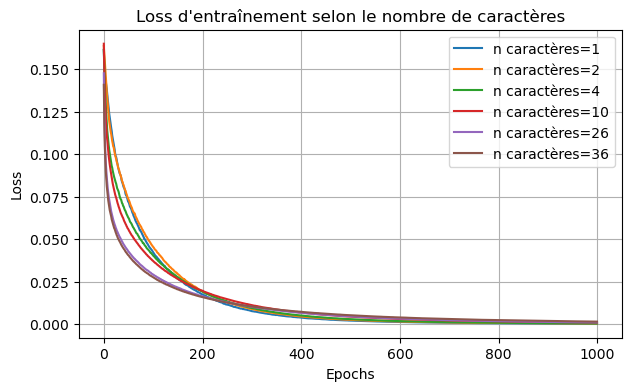

In [68]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(history_list):
    plt.plot(history, label=f'n caractères={int(len(X_list[i])/39)}')
plt.title('Loss d\'entraînement selon le nombre de caractères')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
for item in history_list:
    print(item[-1])

0.00038242827539808246
0.00047136757856600786
0.0005336789924941161
0.0011187656623309395
0.00115281328329012
0.0016191854551754724


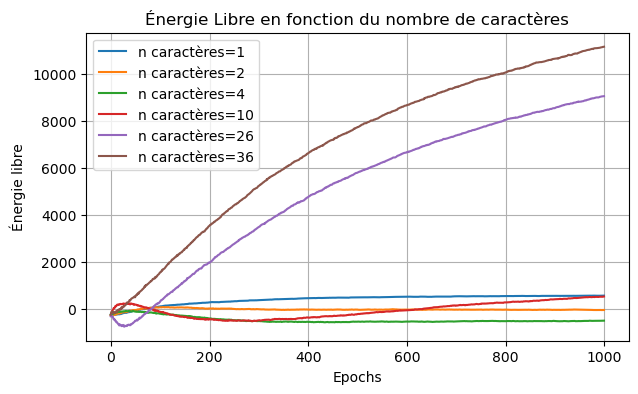

In [70]:
plt.figure(figsize=(7, 4))
for i, history in enumerate(free_energy_list):
    plt.plot(history, label=f'n caractères={int(len(X_list[i])/39)}')
plt.title('Énergie Libre en fonction du nombre de caractères')
plt.xlabel('Epochs')
plt.ylabel('Énergie libre')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
import numpy as np
from scipy.spatial.distance import jensenshannon

def js_divergence(data1, data2):
    data1_hist, _ = np.histogram(data1, bins=100, density=True)
    data2_hist, _ = np.histogram(data2, bins=100, density=True)
    js_div = jensenshannon(data1_hist, data2_hist)
    return js_div

js_divergences = []
for i, rbm in enumerate(rbm_list):
    generated_data = generer_image_RBM(model=rbm, nb_images=len(X_list[i]), nb_iter=200, size_img=get_image_size())
    js_div = js_divergence(X_list[i], generated_data)
    js_divergences.append(js_div)
    print(f"Model {i+1} JS Divergence: {js_div}")

Model 1 JS Divergence: 0.07324992577730276
Model 2 JS Divergence: 0.09629013932797584
Model 3 JS Divergence: 0.08856554271833039
Model 4 JS Divergence: 0.34035250424737856
Model 5 JS Divergence: 0.02099379473187916
Model 6 JS Divergence: 0.10483191281812242


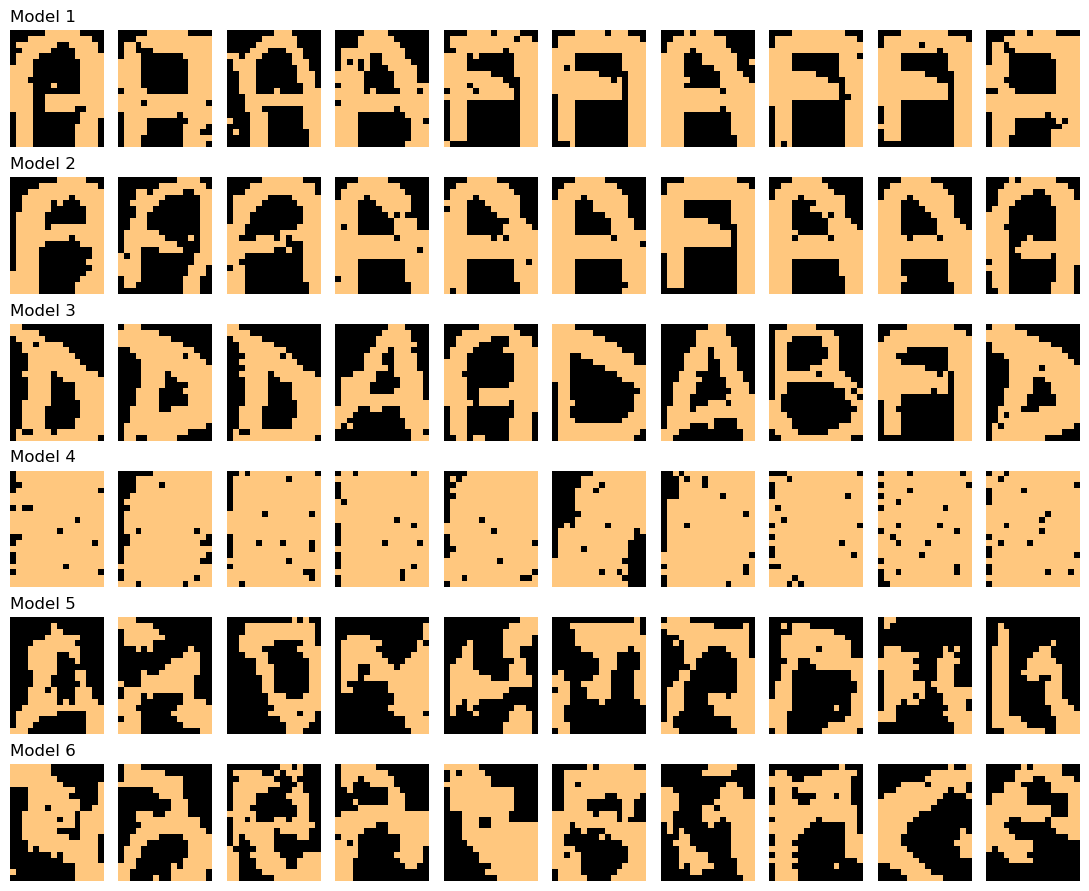

In [90]:
import matplotlib.pyplot as plt
from src.generate import generer_image_RBM
from src.load_dataset import get_image_size

all_images = []
for rbm in rbm_list:
    images = generer_image_RBM(model=rbm, nb_images=10, nb_iter=200, size_img=get_image_size())
    all_images.extend(images)

def plot_images_grid(images, rows, cols, titles, figsize=(11, 9)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='copper')
        ax.axis('off')
        if i % cols == 0:
            ax.set_title(titles[i // cols], fontsize=12, loc='left')
    plt.tight_layout()
    plt.show()

titles = [f'Model {i+1}' for i in range(len(rbm_list))]
plot_images_grid(all_images, rows=6, cols=10, titles=titles)